In [17]:
# import modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import backend
import numpy as np 
import pandas as pd
import os

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<Figure size 432x288 with 0 Axes>

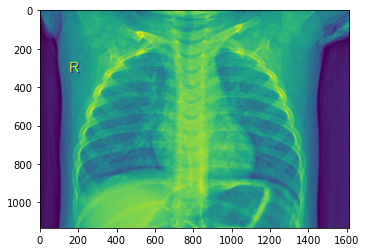

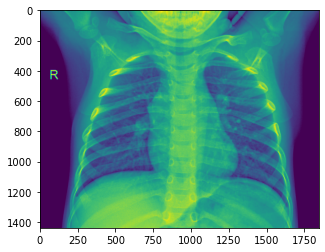

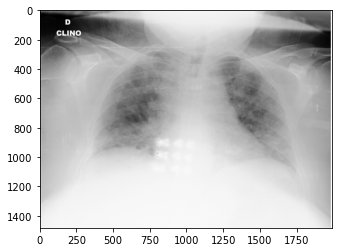

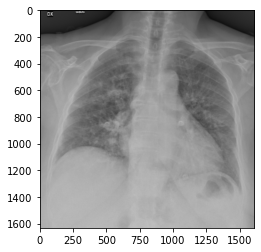

<Figure size 432x288 with 0 Axes>

In [18]:
# load dataset of x-ray images and show image
# dataset downloaded from Kaggle "covid-19 Xray images using cnn", URL: https://www.kaggle.com/akkinasrikar/covid19-xray-images-using-cnn?select=images

dataset = "small_input"

train_normal = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/train/normal/*')]
train_covid = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/train/covid/*')]
test_normal = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/test/normal/*')]
test_covid = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/test/covid/*')]

plt.imshow(train_normal[0])
plt.figure()
plt.imshow(train_normal[1])
plt.figure()
plt.imshow(train_covid[0])
plt.figure()
plt.imshow(train_covid[1])
plt.figure()


In [19]:
print("train_normal:", len(train_normal))
print("train_covid:", len(train_covid))
print("test_normal:", len(test_normal))
print("test_covid:", len(test_covid))

train_normal: 100
train_covid: 100
test_normal: 25
test_covid: 25


In [45]:
# input processing code come from Kaggle expert Lviv, Lviv Oblas (Keras-NN | X-Ray | Predict pneumonia | 86.54%) URL: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54#Binary-classification-with-Keras-neural-network

# dimensions of our images.
img_width, img_height = 288, 288

In [46]:
train_data_dir = 'small_input/train' 
validation_data_dir = 'small_input/test'


train_samples = 200
validation_samples = 50
epochs = 10
batch_size = 50

In [47]:
if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [48]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 50 images belonging to 2 classes.


In [51]:
# build CNN model
# code for building model come from 'https://www.tensorflow.org/tutorials/images/cnn', I adjust some parameters

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 286, 286, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 143, 143, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 141, 141, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 70, 70, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 68, 68, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 295936)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [53]:
# compile model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
%time
# pass model through dataset
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Wall time: 0 ns
Epoch 1/10
4/4 [==============================] - 19s 5s/step - loss: 5.6496 - accuracy: 0.5300 - val_loss: 3.0629 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 19s 5s/step - loss: 1.9742 - accuracy: 0.5400 - val_loss: 1.1221 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 18s 4s/step - loss: 0.8244 - accuracy: 0.6250 - val_loss: 0.1346 - val_accuracy: 0.9800
Epoch 4/10
4/4 [==============================] - 18s 4s/step - loss: 0.3860 - accuracy: 0.8500 - val_loss: 0.1524 - val_accuracy: 0.9400
Epoch 5/10
4/4 [==============================] - 17s 4s/step - loss: 0.3196 - accuracy: 0.8650 - val_loss: 0.0985 - val_accuracy: 0.9800
Epoch 6/10
4/4 [==============================] - 18s 5s/step - loss: 0.2489 - accuracy: 0.8850 - val_loss: 0.0813 - val_accuracy: 0.9800
Epoch 7/10
4/4 [==============================] - 18s 5s/step - loss: 0.2005 - accuracy: 0.9200 - val_loss: 0.0720 - val_accuracy: 0.9800
Epoch 8/10
4/4 [==

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [56]:
model.save_weights('small_288.h5')

# evaluate the model
scores = model.evaluate(validation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9600

accuracy: 96.00%


1/1 - 0s - loss: 0.0403 - accuracy: 0.9600


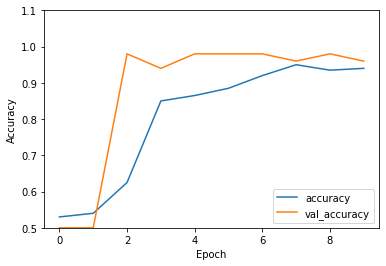

In [58]:
# plot model evaluation
# code come from https://www.tensorflow.org/tutorials/images/cnn#evaluate_the_model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [59]:
# outlier test

# dimensions of our images.
img_width, img_height = 288, 288

train_data_dir = 'input/train' 
validation_data_dir = 'outlier_test'


train_samples = 200
validation_samples = 20
epochs = 10
batch_size = 50

if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    # this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# build CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# run model
epochs=10

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

# evaluate model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

model.save_weights('first_try.h5')

# evaluate the model
scores = model.evaluate(validation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'input/train'

2/2 - 0s - loss: 2.1693 - accuracy: 0.4000


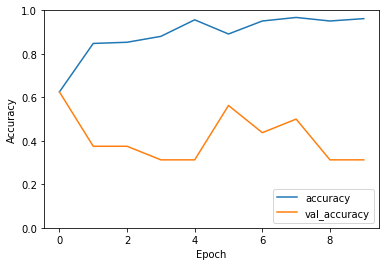

In [40]:
# evluate outlier-test

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)